In [1]:
#packages needed to be imported
import numpy as np 
import math
import scipy.stats
import operator
import pandas as pd
import seaborn

In [2]:
%%bash
cp /stor/work/Bio321G_Spring2019/megan_mini/dataMeanFiltered.txt .

In [3]:
#this prints out the gene expressed data
data = "dataMeanFiltered.txt"
geneExpressed = pd.read_csv(data)
geneExpressed.head()

,Gene_Symbol,CTRL_fib_6,CTRL_fib_6.1,PD_iPSC_2_K1,CTRL_iPSC_1_K1,PD_MN_1_K1,PD_iPSC_4_K3,PD_iPSC_9_K2,CTRL_iPSC_1_K2,PD_iPSC_8_K2,...,CTRL_iPSC_6_K2,PD_fib_3,CTRL_MN_1_K2,PD_fib_4,CTRL_iPSC_6_K1,PD_iPSC_2_K2,PD_iPSC_1_K3,PD_iPSC_3_K2,variance,mean
0,SEPT1,0.84355,0.84355,0.59758,0.40222,0.97123,0.57035,0.40383,0.38624,0.37413,...,0.53966,1.00020,0.36366,0.88979,0.42066,0.56344,0.40179,0.59761,0.039412,0.551704
1,SEPT2,65.71408,65.71408,66.00671,44.11975,73.79544,62.91026,48.70982,44.71344,45.27382,...,39.12646,69.65028,95.68051,79.99893,41.86760,81.10495,39.70650,48.59173,582.208713,75.103094
2,SEPT3,0.42654,0.42654,25.71404,12.20915,67.56067,16.54856,13.36022,14.82868,11.93627,...,13.98153,0.28295,139.15436,0.28849,14.50975,19.32044,12.08023,15.75430,2044.191170,67.245152
3,SEPT4,0.07749,0.07749,1.32810,0.96409,0.75064,0.58504,1.21507,1.04009,0.89457,...,0.82942,0.10394,1.75487,0.08478,1.01829,1.02381,0.62070,1.11981,0.214172,0.745067
4,SEPT5,5.83244,5.83244,6.68833,1.32786,8.69053,1.22547,1.36280,1.05280,0.68104,...,0.88341,3.58679,10.42235,3.28071,1.65147,1.53183,1.18388,1.12444,22.464249,5.294466


In [4]:
geneExpressed.set_index('Gene_Symbol', inplace=True)

In [5]:
geneExpressed = geneExpressed.drop(['mean', 'variance'], axis =1)

In [6]:
geneExpressed = geneExpressed.replace(to_replace=0,value=0.01)
geneExpressed.head()

,CTRL_fib_6,CTRL_fib_6.1,PD_iPSC_2_K1,CTRL_iPSC_1_K1,PD_MN_1_K1,PD_iPSC_4_K3,PD_iPSC_9_K2,CTRL_iPSC_1_K2,PD_iPSC_8_K2,PD_iPSC_1_K2,...,PD_fib_9,PD_fib_8,CTRL_iPSC_6_K2,PD_fib_3,CTRL_MN_1_K2,PD_fib_4,CTRL_iPSC_6_K1,PD_iPSC_2_K2,PD_iPSC_1_K3,PD_iPSC_3_K2
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
SEPT1,0.84355,0.84355,0.59758,0.40222,0.97123,0.57035,0.40383,0.38624,0.37413,0.51332,...,1.01286,0.51621,0.53966,1.00020,0.36366,0.88979,0.42066,0.56344,0.40179,0.59761
SEPT2,65.71408,65.71408,66.00671,44.11975,73.79544,62.91026,48.70982,44.71344,45.27382,42.81785,...,69.50600,54.96714,39.12646,69.65028,95.68051,79.99893,41.86760,81.10495,39.70650,48.59173
SEPT3,0.42654,0.42654,25.71404,12.20915,67.56067,16.54856,13.36022,14.82868,11.93627,11.72551,...,0.16701,0.71622,13.98153,0.28295,139.15436,0.28849,14.50975,19.32044,12.08023,15.75430
SEPT4,0.07749,0.07749,1.32810,0.96409,0.75064,0.58504,1.21507,1.04009,0.89457,0.74578,...,0.12078,0.20018,0.82942,0.10394,1.75487,0.08478,1.01829,1.02381,0.62070,1.11981
SEPT5,5.83244,5.83244,6.68833,1.32786,8.69053,1.22547,1.36280,1.05280,0.68104,0.85927,...,4.61197,4.12203,0.88341,3.58679,10.42235,3.28071,1.65147,1.53183,1.18388,1.12444


In [7]:
annotFile = "anot.txt"
annot = pd.read_table(annotFile, sep="\t", header=0, index_col=0)
annot.head()

,tissue_type,sample_type
sample_title,,
CTRL_fib_6,Fibroblasts,control
PD_iPSC_2_K1,stem cell,PD
CTRL_iPSC_1_K1,stem cell,control
PD_MN_1_K1,midbrain neuron,PD
PD_iPSC_4_K3,stem cell,PD


In [8]:
## pull tissue type info from annot DataFrame
tissue = annot["tissue_type"]
## simplify tissue names
tissue = tissue.str.replace("^tissue: ", "")

In [9]:
## pull tissue type info from annot DataFrame
sample = annot["sample_type"]
## simplify tissue names
sample = sample.str.replace("^sample: ", "")

In [10]:
#this is responsible for separating the midbrain neurons from the other samples
#will be used later to separate the PD and control samples
midbrain =  (tissue == "midbrain neuron")
midbrain = annot[midbrain]

In [11]:
#not logged dataframe 
MB_H = midbrain.index
MB_HFrame = geneExpressed[MB_H]
MB_HFrame

,PD_MN_1_K1,CTRL_MN_3_K1,PD_MN_5_K1,CTRL_MN_5_K1,PD_MN_3_K2,CTRL_MN_2_K3,CTRL_MN_3_K3,PD_MN_3_K1,CTRL_MN_1_K1,PD_MN_4_K1,CTRL_MN_4_K1,CTRL_MN_2_K2,PD_MN_2_K2,PD_MN_6_K1,CTRL_MN_1_K2
Gene_Symbol,,,,,,,,,,,,,,,
SEPT1,0.97123,0.48385,0.51590,0.32434,0.22593,0.30845,0.74512,0.87413,0.33205,0.75694,0.71724,0.54303,0.81219,0.50880,0.36366
SEPT2,73.79544,92.35461,113.05281,71.65788,123.08660,131.35318,77.56091,71.61257,93.61449,122.93654,81.84142,129.41069,105.78790,114.92868,95.68051
SEPT3,67.56067,84.45258,115.90843,160.90068,88.90001,148.39517,82.00456,111.81950,141.78386,71.03413,93.95532,143.59775,66.48291,107.96935,139.15436
SEPT4,0.75064,0.27297,0.71088,1.38202,0.83019,1.24237,0.58920,0.76984,1.28599,0.82998,0.65362,1.03125,0.48424,0.62101,1.75487
SEPT5,8.69053,10.12611,10.12870,18.35719,6.50708,11.20119,15.00806,19.19511,11.60167,10.01882,12.82402,15.22412,9.83397,14.54000,10.42235
SEPT6,18.41996,11.33709,23.18824,20.48279,27.62545,39.68166,16.35069,25.31033,43.97877,13.44967,18.26445,35.13063,11.15686,28.70349,45.20716
SEPT7,11.50828,17.26897,19.15021,15.21778,32.70644,30.00819,13.22014,13.64871,18.55154,12.95092,14.45600,23.47869,14.00988,18.12245,21.64668
SEPT8,13.12845,11.87703,11.68948,10.46486,13.11628,16.29482,13.02180,15.91436,14.16350,11.03434,15.41710,12.84671,12.85066,10.39071,11.48160
SEPT9,22.41420,18.20521,12.45270,18.12693,9.82216,10.83462,19.07383,18.79615,13.17422,15.50001,21.77654,12.89548,21.51813,16.07744,9.80418


In [12]:
#logged dataframe for the midbrain 
mb = MB_HFrame.apply(np.log10)
mb

,PD_MN_1_K1,CTRL_MN_3_K1,PD_MN_5_K1,CTRL_MN_5_K1,PD_MN_3_K2,CTRL_MN_2_K3,CTRL_MN_3_K3,PD_MN_3_K1,CTRL_MN_1_K1,PD_MN_4_K1,CTRL_MN_4_K1,CTRL_MN_2_K2,PD_MN_2_K2,PD_MN_6_K1,CTRL_MN_1_K2
Gene_Symbol,,,,,,,,,,,,,,,
SEPT1,-0.012678,-0.315289,-0.287434,-0.488999,-0.646026,-0.510815,-0.127774,-0.058424,-0.478797,-0.120939,-0.144335,-0.265176,-0.090342,-0.293453,-0.439304
SEPT2,1.868030,1.965459,2.053281,1.855264,2.090211,2.118441,1.889643,1.854989,1.971343,2.089681,1.912973,2.111970,2.024436,2.060428,1.980823
SEPT3,1.829694,1.926613,2.064115,2.206558,1.948902,2.171420,1.913838,2.048518,2.151627,1.851467,1.972921,2.157148,1.822710,2.033300,2.143497
SEPT4,-0.124568,-0.563885,-0.148204,0.140514,-0.080823,0.094251,-0.229737,-0.113600,0.109238,-0.080932,-0.184675,0.013364,-0.314939,-0.206901,0.244245
SEPT5,0.939046,1.005443,1.005554,1.263806,0.813386,1.049264,1.176325,1.283191,1.064521,1.000817,1.108024,1.182532,0.992729,1.162564,1.017966
SEPT6,1.265289,1.054502,1.365268,1.311389,1.441309,1.598590,1.213536,1.403298,1.643243,1.128712,1.261607,1.545686,1.047542,1.457935,1.655207
SEPT7,1.061010,1.237266,1.282174,1.182351,1.514633,1.477240,1.121236,1.135092,1.268380,1.112301,1.160048,1.370674,1.146434,1.258217,1.335391
SEPT8,1.118213,1.074708,1.067795,1.019733,1.117811,1.212050,1.114671,1.201789,1.151171,1.042746,1.188003,1.108792,1.108925,1.016645,1.060002
SEPT9,1.350523,1.260196,1.095264,1.258324,0.992207,1.034814,1.280438,1.274069,1.119725,1.190332,1.337989,1.110438,1.332805,1.206217,0.991411


In [13]:
#this is responsible for getting the number of samples of midbrain neurons and sporadic PD
pd_mbSamples =  ((sample == "PD")) & (tissue == "midbrain neuron")
numPD_MB = annot[pd_mbSamples].shape[0]
numPD_MB

7

In [14]:
MB_PD =  annot[pd_mbSamples]
MBP = MB_PD.index
MB_LIST = MBP.tolist()
MB_HFrame[MB_LIST]

,PD_MN_1_K1,PD_MN_5_K1,PD_MN_3_K2,PD_MN_3_K1,PD_MN_4_K1,PD_MN_2_K2,PD_MN_6_K1
Gene_Symbol,,,,,,,
SEPT1,0.97123,0.51590,0.22593,0.87413,0.75694,0.81219,0.50880
SEPT2,73.79544,113.05281,123.08660,71.61257,122.93654,105.78790,114.92868
SEPT3,67.56067,115.90843,88.90001,111.81950,71.03413,66.48291,107.96935
SEPT4,0.75064,0.71088,0.83019,0.76984,0.82998,0.48424,0.62101
SEPT5,8.69053,10.12870,6.50708,19.19511,10.01882,9.83397,14.54000
SEPT6,18.41996,23.18824,27.62545,25.31033,13.44967,11.15686,28.70349
SEPT7,11.50828,19.15021,32.70644,13.64871,12.95092,14.00988,18.12245
SEPT8,13.12845,11.68948,13.11628,15.91436,11.03434,12.85066,10.39071
SEPT9,22.41420,12.45270,9.82216,18.79615,15.50001,21.51813,16.07744


In [15]:
#this is responsible for getting the number of samples of midbrain neurons and healthy (control)
h_mbSamples =  ((sample == "control")) & (tissue == "midbrain neuron")
numH_MB = annot[h_mbSamples].shape[0]
numH_MB

8

In [16]:
MB_C =  annot[h_mbSamples]
MBC = MB_C.index
MB_C_LIST = MBC.tolist()
MB_HFrame[MB_C_LIST]

,CTRL_MN_3_K1,CTRL_MN_5_K1,CTRL_MN_2_K3,CTRL_MN_3_K3,CTRL_MN_1_K1,CTRL_MN_4_K1,CTRL_MN_2_K2,CTRL_MN_1_K2
Gene_Symbol,,,,,,,,
SEPT1,0.48385,0.32434,0.30845,0.74512,0.33205,0.71724,0.54303,0.36366
SEPT2,92.35461,71.65788,131.35318,77.56091,93.61449,81.84142,129.41069,95.68051
SEPT3,84.45258,160.90068,148.39517,82.00456,141.78386,93.95532,143.59775,139.15436
SEPT4,0.27297,1.38202,1.24237,0.58920,1.28599,0.65362,1.03125,1.75487
SEPT5,10.12611,18.35719,11.20119,15.00806,11.60167,12.82402,15.22412,10.42235
SEPT6,11.33709,20.48279,39.68166,16.35069,43.97877,18.26445,35.13063,45.20716
SEPT7,17.26897,15.21778,30.00819,13.22014,18.55154,14.45600,23.47869,21.64668
SEPT8,11.87703,10.46486,16.29482,13.02180,14.16350,15.41710,12.84671,11.48160
SEPT9,18.20521,18.12693,10.83462,19.07383,13.17422,21.77654,12.89548,9.80418


In [17]:
#this gets the columns for midbrain; helps get the condition 
mb.columns

Index(['PD_MN_1_K1', 'CTRL_MN_3_K1', 'PD_MN_5_K1', 'CTRL_MN_5_K1',
       'PD_MN_3_K2', 'CTRL_MN_2_K3', 'CTRL_MN_3_K3', 'PD_MN_3_K1',
       'CTRL_MN_1_K1', 'PD_MN_4_K1', 'CTRL_MN_4_K1', 'CTRL_MN_2_K2',
       'PD_MN_2_K2', 'PD_MN_6_K1', 'CTRL_MN_1_K2'],
      dtype='object')

In [18]:
#this is the list of conditions 1 represents with PD and -1 represents as a control
condition = [1,-1,1,-1,1,-1,-1,1,-1,1,-1,-1,1,1,-1]

In [19]:
#t test to get corr coeff , t stat and p value
#this is responsble for the t-test for the midbrain 
def mytstatistic(x, y = condition, n = numPD_MB+numH_MB):
    corrcoeff = np.corrcoef(x.values, y)[0,1]
    tstat = ((np.sqrt(n-2))/(np.sqrt(1-np.square(corrcoeff))))*corrcoeff
    p = 2*(1-scipy.stats.t.cdf(np.abs(tstat), n-2))
    return (p)

In [20]:
p = mytstatistic(mb,condition,numPD_MB+numH_MB)

/opt/jupyterhub/pyvenv/lib/python3.4/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/jupyterhub/pyvenv/lib/python3.4/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [21]:
#the ones that are less than 0.05 are significantly differentially expressed
mb_Ttest = mb.apply(mytstatistic, axis=1)
mb_Ttest

/opt/jupyterhub/pyvenv/lib/python3.4/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/jupyterhub/pyvenv/lib/python3.4/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Gene_Symbol
SEPT1        0.200909
SEPT2        0.565118
SEPT3        0.037528
SEPT4        0.329696
SEPT5        0.230960
SEPT6        0.310635
SEPT7        0.463017
SEPT8        0.554597
SEPT9        0.639148
SEPT10       0.202676
SEPT11       0.095638
SEPT12       0.515635
SEPT15       0.993064
27K          0.662372
28H          0.502552
354J5        0.783057
5-HT5B       0.572725
71-7A3       0.822195
A1BG         0.206073
A1BG-AS1     0.385617
A1CF         0.982181
A2M          0.012406
A2M-AS1      0.024368
A2ML1        0.970342
A2MP1        0.029947
A3GALT2      0.323719
A4GALT       0.742637
A4GNT        0.676500
A6ps1        0.774705
A-761H5.2    0.043671
               ...   
ZSCAN22      0.831146
ZSCAN23      0.283058
ZSCAN25      0.405083
ZSCAN26      0.216621
ZSCAN29      0.935562
ZSCAN30      0.752148
ZSCAN31      0.550871
ZSCAN32      0.967299
ZSCAN5A      0.250731
ZSCAN5B      0.868328
ZSCAN9       0.207312
ZSWIM1       0.687071
ZSWIM2       0.924656
ZSWIM3       0.41697

In [22]:
#this is the dictionary for midbrain 
p_dict_mb = mb_Ttest.to_dict()
p_dict_mb

{'ENSG00000224064': 0.3688462917839306,
 'SYNPR': 0.035097987768827776,
 'AK055014': 0.8148363014643241,
 'ENSG00000214335': 0.15764099090550943,
 'LTBP1': 0.3142942769911805,
 'TSR2': 0.7650803520300054,
 'ENSG00000241556': 0.20658233623917832,
 'ATP6V1E2': 0.8769672926621745,
 'AK124095': 0.7690463895689523,
 'PRINS': 0.2982568278422957,
 'SLC19A1': 0.30611917877636263,
 'XCL1': 0.9969114125113396,
 'NKAIN2': 0.3809486495191585,
 'AK092072': 0.37619092979293,
 'ZNF626': 0.5189224197843905,
 'ASLL': 0.6113002000040337,
 'CDRT1': 0.2582354954079944,
 'ADORA2A-AS1': 0.6235253364100202,
 'PCDH8': 0.5281768890948721,
 'AK098409': 0.04072114431212537,
 'KHDC1': 0.2961029893096625,
 'UXT': 0.39001128488430026,
 'CISD1': 0.2695223369632287,
 'HIP1': 0.8027072436597376,
 'CD247': 0.4028093700536508,
 'OGFRP1': 0.17380112871762954,
 'RAB9A': 0.14268760008868764,
 'SIRT6': 0.9760512851314287,
 'AK130280': 0.9706545803711619,
 'CCDC122': 0.5974631746902852,
 'ROR1': 0.04718814103638991,
 'EIF4E1

In [23]:
#this is the differtially expressed genes list for the midbrain
deg_list_mb = []
for key in p_dict_mb.keys():
    if p_dict_mb[key] < 0.01:
        deg_list_mb.append(key)

In [24]:
#function that calls the differentialy expressed genes list for the midbrain 
deg_list_mb

['ENSG00000231940',
 'KCNA7',
 'CRB1',
 'LOC440982',
 'PITX3',
 'ARL4A',
 'ENSG00000258613',
 'ANKRD55',
 'PTPRN2',
 'LOC100288443',
 'EMB',
 'ENSG00000271543',
 'AK126277',
 'ENSG00000214908',
 'NLRC3',
 'PTCSC1',
 'BTNL9',
 'MDM2',
 'LOC100129434',
 'AK093761',
 'CBFB',
 'PAFAH2',
 'CASQ1',
 'SYT13',
 'TUB',
 'AK094157',
 'PCDHB11',
 'LOC285147',
 'EID2B',
 'MAP1LC3C',
 'LOC650157',
 'NWD2',
 'ATP2B2',
 'PABPC1L2A',
 'ENSG00000248711',
 'ENSG00000258153',
 'USP50',
 'EFCAB10',
 'ABCC2',
 'SESN1',
 'CLDN7',
 'MATN2',
 'TFPI2',
 'NKX2-5',
 'ENSG00000238231',
 'WNT1',
 'TAC1',
 'CADM3-AS1',
 'GABRG2',
 'ZIC4',
 'LOC101929140',
 'NPTX1',
 'DCLK3',
 'ENSG00000257074',
 'ABCA6',
 'VSTM2A',
 'ENSG00000236862',
 'GABRA3',
 'IFITM1',
 'ENSG00000230154',
 'PCDHA1',
 'TPM3P9',
 'SIRT2',
 'HMX3',
 'TSPAN7',
 'GPC5',
 'PCDHA13',
 'ICA1L',
 'LONP2',
 'JSRP1',
 'ALPL',
 'SLC6A7',
 'RHBDD1',
 'SCN1A',
 'GXL_1223680',
 'PINK1',
 'TMOD2',
 'ENSG00000261527',
 'FLJ16779',
 'GDAP2',
 'LINC00367',
 'AK02

In [25]:
#this is responsible for separating the stem cells from the other samples
stem_cell =  (tissue == "stem cell")
stem_cell = annot[stem_cell]

In [26]:
#Not logged data
SC_H = stem_cell.index
SC_HFrame = geneExpressed[SC_H]

In [27]:
#logged data
sc = SC_HFrame.apply(np.log10)
sc

,PD_iPSC_2_K1,CTRL_iPSC_1_K1,PD_iPSC_4_K3,PD_iPSC_9_K2,CTRL_iPSC_1_K2,PD_iPSC_8_K2,PD_iPSC_1_K2,PD_iPSC_5_K3,CTRL_iPSC_4_K2,PD_iPSC_3_K1,...,CTRL_iPSC_3_K3,CTRL_iPSC_3_K2,CTRL_iPSC_4_K1,CTRL_iPSC_2_K2,CTRL_iPSC_5_K2,CTRL_iPSC_6_K2,CTRL_iPSC_6_K1,PD_iPSC_2_K2,PD_iPSC_1_K3,PD_iPSC_3_K2
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
SEPT1,-0.223604,-0.395536,-0.243859,-0.393801,-0.413143,-0.426977,-0.289612,-0.127156,-0.372000,-0.341045,...,-0.354038,-0.286904,-0.459633,-0.349916,-0.426212,-0.267880,-0.376069,-0.249152,-0.396001,-0.223582
SEPT2,1.819588,1.644633,1.798721,1.687617,1.650438,1.655847,1.631625,1.446266,1.750359,1.677998,...,1.752982,1.687204,1.661683,1.820253,1.575730,1.592471,1.621878,1.909047,1.598862,1.686562
SEPT3,1.410170,1.086685,1.218760,1.125814,1.171102,1.076869,1.069132,0.944370,1.156689,1.168868,...,1.182962,1.260110,1.127030,1.340998,1.184557,1.145555,1.161660,1.286017,1.082075,1.197399
SEPT4,0.123231,-0.015882,-0.232814,0.084601,0.017071,-0.048386,-0.127389,0.096962,-0.120646,0.142271,...,0.050619,-0.156381,-0.029035,0.122281,0.057716,-0.081225,0.007871,0.010219,-0.207118,0.049144
SEPT5,0.825318,0.123152,0.088303,0.134432,0.022346,-0.166827,-0.065870,0.409333,0.079326,0.101087,...,0.331561,0.407950,0.082390,0.321990,0.295475,-0.053838,0.217871,0.185211,0.073308,0.050936
SEPT6,0.847024,0.690927,0.595609,0.739645,0.633004,0.485186,0.445967,0.708694,0.701403,0.654790,...,0.815119,0.787445,0.744585,0.714321,0.688252,0.629932,0.662731,0.793099,0.435210,0.671591
SEPT7,1.093040,0.912021,0.983755,0.962773,0.934543,0.964752,0.961375,0.575331,1.040084,0.974230,...,0.976720,0.966528,1.006254,1.002390,0.921132,0.935454,0.891749,1.149194,0.898229,0.987508
SEPT8,1.059278,0.858954,0.877011,0.840734,0.768570,0.862530,0.841496,0.786420,0.897632,0.810470,...,0.868096,0.857536,0.792294,0.899240,0.885043,0.823001,0.882353,0.908333,0.833561,0.872465
SEPT9,1.569534,1.347598,1.509285,1.443895,1.341053,1.367832,1.353777,1.227680,1.440217,1.383667,...,1.459541,1.361093,1.356591,1.484734,1.334390,1.359484,1.321905,1.546263,1.295588,1.428685


In [28]:
#this is responsible for getting the number of samples of stem cells and sporadic PD
pd_scSamples =  ((sample == "PD")) & (tissue == "stem cell")
numPD_SC = annot[pd_scSamples].shape[0]
numPD_SC

16

In [29]:
S_PD =  annot[pd_scSamples]
PDSC = S_PD.index
SD_LIST = PDSC.tolist()
SC_HFrame[SD_LIST]

,PD_iPSC_2_K1,PD_iPSC_4_K3,PD_iPSC_9_K2,PD_iPSC_8_K2,PD_iPSC_1_K2,PD_iPSC_5_K3,PD_iPSC_3_K1,PD_iPSC_9_K1,PD_iPSC_6_K1,PD_iPSC_4_K2,PD_iPSC_4_K1,PD_iPSC_1_K1,PD_iPSC_5_K1,PD_iPSC_2_K2,PD_iPSC_1_K3,PD_iPSC_3_K2
Gene_Symbol,,,,,,,,,,,,,,,,
SEPT1,0.59758,0.57035,0.40383,0.37413,0.51332,0.74618,0.45599,0.47150,0.61908,0.59099,0.32232,0.46948,0.51170,0.56344,0.40179,0.59761
SEPT2,66.00671,62.91026,48.70982,45.27382,42.81785,27.94257,47.64287,46.38301,48.50872,70.75102,49.81415,43.60241,46.00486,81.10495,39.70650,48.59173
SEPT3,25.71404,16.54856,13.36022,11.93627,11.72551,8.79772,14.75257,14.08384,14.97528,24.52054,17.17693,11.25570,11.65887,19.32044,12.08023,15.75430
SEPT4,1.32810,0.58504,1.21507,0.89457,0.74578,1.25015,1.38762,1.33592,0.80532,1.32569,1.55788,0.71658,1.10941,1.02381,0.62070,1.11981
SEPT5,6.68833,1.22547,1.36280,0.68104,0.85927,2.56645,1.26208,1.47407,0.95305,1.22062,1.56227,0.75617,0.96864,1.53183,1.18388,1.12444
SEPT6,7.03111,3.94102,5.49092,3.05623,2.79233,5.11322,4.51638,4.73770,3.46836,5.15533,3.88175,3.30999,4.95064,6.21010,2.72402,4.69452
SEPT7,12.38911,9.63286,9.17853,9.22045,9.14903,3.76124,9.42389,9.10847,7.56078,10.54301,8.38295,9.35218,9.99406,14.09917,7.91096,9.71646
SEPT8,11.46246,7.53374,6.93002,7.28668,6.94218,6.11533,6.46353,7.73921,6.70348,8.65181,6.40522,6.73362,6.89971,8.09716,6.81650,7.45530
SEPT9,37.11366,32.30614,27.79040,23.32556,22.58276,16.89195,24.19172,25.31423,25.78039,28.10412,24.42287,21.71111,23.87166,35.17734,19.75093,26.83395


In [30]:
#this is responsible for getting the number of samples of stem cells and healthy (control)
h_scSamples =  ((sample == "control")) & (tissue == "stem cell")
numH_SC = annot[h_scSamples].shape[0]
numH_SC

15

In [31]:
S_H =  annot[h_scSamples]
SCC = S_H.index
SCC_LIST = SCC.tolist()
SC_HFrame[SCC_LIST]

,CTRL_iPSC_1_K1,CTRL_iPSC_1_K2,CTRL_iPSC_4_K2,CTRL_iPSC_5_K1,CTRL_iPSC_2_K3,CTRL_iPSC_3_K1,CTRL_iPSC_2_K1,CTRL_iPSC_5_K3,CTRL_iPSC_3_K3,CTRL_iPSC_3_K2,CTRL_iPSC_4_K1,CTRL_iPSC_2_K2,CTRL_iPSC_5_K2,CTRL_iPSC_6_K2,CTRL_iPSC_6_K1
Gene_Symbol,,,,,,,,,,,,,,,
SEPT1,0.40222,0.38624,0.42462,0.53405,0.67337,0.38553,0.63515,0.64421,0.44255,0.51653,0.34703,0.44677,0.37479,0.53966,0.42066
SEPT2,44.11975,44.71344,56.28062,41.29213,69.87209,59.23090,60.93620,51.70491,56.62156,48.66358,45.88634,66.10782,37.64697,39.12646,41.86760
SEPT3,12.20915,14.82868,14.34461,16.57748,22.28695,19.16282,14.97921,25.90080,15.23920,18.20162,13.39769,21.92797,15.29525,13.98153,14.50975
SEPT4,0.96409,1.04009,0.75745,1.08606,0.92162,0.96784,0.86193,0.80986,1.12362,0.69762,0.93533,1.32520,1.14213,0.82942,1.01829
SEPT5,1.32786,1.05280,1.20040,1.98168,1.42692,1.02321,2.23805,4.14942,2.14566,2.55829,1.20890,2.09889,1.97458,0.88341,1.65147
SEPT6,4.90825,4.29540,5.02809,6.08422,4.70760,5.77197,4.75055,6.97270,6.53309,6.12978,5.55373,5.17990,4.87811,4.26513,4.59972
SEPT7,8.16621,8.60089,10.96690,8.14598,9.31349,9.41327,9.94823,9.72284,9.47808,9.25823,10.14504,10.05519,8.33934,8.61895,7.79379
SEPT8,7.22693,5.86908,7.90009,8.16311,7.88780,8.53423,8.00592,11.39094,7.38068,7.20338,6.19861,7.92939,7.67438,6.65274,7.62698
SEPT9,22.26373,21.93073,27.55603,21.34674,31.36335,28.46826,30.67276,33.12452,28.80984,22.96639,22.72955,30.53050,21.59684,22.88149,20.98480


In [32]:
#this is the list of conditions 1 represents with PD and -1 represents as a control
condition = [1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1,1,-1, -1, 1, -1,1, -1, 1, 1, -1, -1, -1, -1,  -1, -1, -1, -1, 1, 1, 1]

In [33]:
#t test to get corr coeff , t stat and p value
#this is the t test for the stem cells
def mytstatistic(x, y = condition, n = numH_SC+numPD_SC):
    corrcoeff = np.corrcoef(x.values, y)[0,1]
    tstat = ((np.sqrt(n-2))/(np.sqrt(1-np.square(corrcoeff))))*corrcoeff
    p = 2*(1-scipy.stats.t.cdf(np.abs(tstat), n-2))
    return (p)

In [34]:
#columns that help get the condition 
sc.columns

Index(['PD_iPSC_2_K1', 'CTRL_iPSC_1_K1', 'PD_iPSC_4_K3', 'PD_iPSC_9_K2',
       'CTRL_iPSC_1_K2', 'PD_iPSC_8_K2', 'PD_iPSC_1_K2', 'PD_iPSC_5_K3',
       'CTRL_iPSC_4_K2', 'PD_iPSC_3_K1', 'PD_iPSC_9_K1', 'PD_iPSC_6_K1',
       'CTRL_iPSC_5_K1', 'CTRL_iPSC_2_K3', 'PD_iPSC_4_K2', 'CTRL_iPSC_3_K1',
       'PD_iPSC_4_K1', 'CTRL_iPSC_2_K1', 'PD_iPSC_1_K1', 'PD_iPSC_5_K1',
       'CTRL_iPSC_5_K3', 'CTRL_iPSC_3_K3', 'CTRL_iPSC_3_K2', 'CTRL_iPSC_4_K1',
       'CTRL_iPSC_2_K2', 'CTRL_iPSC_5_K2', 'CTRL_iPSC_6_K2', 'CTRL_iPSC_6_K1',
       'PD_iPSC_2_K2', 'PD_iPSC_1_K3', 'PD_iPSC_3_K2'],
      dtype='object')

In [35]:
p = mytstatistic(sc,condition,numH_SC+numPD_SC)

/opt/jupyterhub/pyvenv/lib/python3.4/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/jupyterhub/pyvenv/lib/python3.4/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [36]:
#the stem cells t test
sc_Ttest = sc.apply(mytstatistic, axis=1)
sc_Ttest

/opt/jupyterhub/pyvenv/lib/python3.4/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/jupyterhub/pyvenv/lib/python3.4/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Gene_Symbol
SEPT1        0.372929
SEPT2        0.896065
SEPT3        0.201413
SEPT4        0.453670
SEPT5        0.209080
SEPT6        0.018581
SEPT7        0.876813
SEPT8        0.437228
SEPT9        0.986552
SEPT10       0.355916
SEPT11       0.862832
SEPT12       0.450949
SEPT15       0.805099
27K          0.314026
28H          0.454389
354J5        0.231649
5-HT5B       0.950693
71-7A3       0.529275
A1BG         0.294185
A1BG-AS1     0.275664
A1CF         0.858789
A2M          0.415208
A2M-AS1      0.060941
A2ML1        0.457977
A2MP1        0.230730
A3GALT2      0.870582
A4GALT       0.964535
A4GNT        0.153844
A6ps1        0.526755
A-761H5.2    0.210781
               ...   
ZSCAN22      0.996538
ZSCAN23      0.011515
ZSCAN25      0.549188
ZSCAN26      0.385609
ZSCAN29      0.835673
ZSCAN30      0.501983
ZSCAN31      0.502088
ZSCAN32      0.936223
ZSCAN5A      0.074959
ZSCAN5B      0.118370
ZSCAN9       0.064186
ZSWIM1       0.252883
ZSWIM2       0.213443
ZSWIM3       0.00501

In [37]:
#pvalue dictionary of the stem cells
p_dict_sc = sc_Ttest.to_dict()
p_dict_sc

{'ENSG00000224064': 0.9707828464064865,
 'SYNPR': 0.4910068266594363,
 'AK055014': 0.09502694664510836,
 'ENSG00000214335': 0.6454149543102852,
 'LTBP1': 0.318657782274425,
 'TSR2': 0.12130888053138467,
 'ENSG00000241556': 0.781412366695786,
 'ATP6V1E2': 0.1365104855919932,
 'AK124095': 0.5810899783645382,
 'PRINS': 0.5133061095719622,
 'SLC19A1': 0.12656198202803592,
 'XCL1': 0.969336575265412,
 'NKAIN2': 0.9394060135997477,
 'AK092072': 0.013921929385627196,
 'ZNF626': 0.6362520869273611,
 'ASLL': 0.37543899694850524,
 'CDRT1': 0.8764096111316513,
 'ADORA2A-AS1': 0.2539397432307451,
 'PCDH8': 0.9507838681401548,
 'AK098409': 0.8987270069597739,
 'KHDC1': 0.24755544281369612,
 'UXT': 0.36056543250910167,
 'CISD1': 0.36723465653028375,
 'HIP1': 0.34422540405276014,
 'CD247': 0.24910426591373613,
 'OGFRP1': 0.05284211283250628,
 'RAB9A': 0.6316183318520965,
 'SIRT6': 0.4664977027916697,
 'AK130280': 0.9061032897091295,
 'CCDC122': 0.11274468252913983,
 'ROR1': 0.7572991569324912,
 'EIF4

In [38]:
#the differentially expressed genes list for stem cells
deg_list_sc = []
for key in p_dict_sc.keys():
    if p_dict_sc[key] < 0.01:
        deg_list_sc.append(key)

In [39]:
#prints out the list for stem cells
len(deg_list_sc)

457

In [40]:
#this is responsible for separating the fibroblasts from the other samples
#will be used later to separate the PD and control samples
fibroblasts =  (tissue == "Fibroblasts")
fibroblasts = annot[fibroblasts]

In [41]:
#not logged function of fibroblasts cells
F_H = fibroblasts.index
F_HFrame = geneExpressed[F_H]

In [42]:
#fibroblast cells logged data
F_cells = MB_HFrame.apply(np.log10)
F_cells

,PD_MN_1_K1,CTRL_MN_3_K1,PD_MN_5_K1,CTRL_MN_5_K1,PD_MN_3_K2,CTRL_MN_2_K3,CTRL_MN_3_K3,PD_MN_3_K1,CTRL_MN_1_K1,PD_MN_4_K1,CTRL_MN_4_K1,CTRL_MN_2_K2,PD_MN_2_K2,PD_MN_6_K1,CTRL_MN_1_K2
Gene_Symbol,,,,,,,,,,,,,,,
SEPT1,-0.012678,-0.315289,-0.287434,-0.488999,-0.646026,-0.510815,-0.127774,-0.058424,-0.478797,-0.120939,-0.144335,-0.265176,-0.090342,-0.293453,-0.439304
SEPT2,1.868030,1.965459,2.053281,1.855264,2.090211,2.118441,1.889643,1.854989,1.971343,2.089681,1.912973,2.111970,2.024436,2.060428,1.980823
SEPT3,1.829694,1.926613,2.064115,2.206558,1.948902,2.171420,1.913838,2.048518,2.151627,1.851467,1.972921,2.157148,1.822710,2.033300,2.143497
SEPT4,-0.124568,-0.563885,-0.148204,0.140514,-0.080823,0.094251,-0.229737,-0.113600,0.109238,-0.080932,-0.184675,0.013364,-0.314939,-0.206901,0.244245
SEPT5,0.939046,1.005443,1.005554,1.263806,0.813386,1.049264,1.176325,1.283191,1.064521,1.000817,1.108024,1.182532,0.992729,1.162564,1.017966
SEPT6,1.265289,1.054502,1.365268,1.311389,1.441309,1.598590,1.213536,1.403298,1.643243,1.128712,1.261607,1.545686,1.047542,1.457935,1.655207
SEPT7,1.061010,1.237266,1.282174,1.182351,1.514633,1.477240,1.121236,1.135092,1.268380,1.112301,1.160048,1.370674,1.146434,1.258217,1.335391
SEPT8,1.118213,1.074708,1.067795,1.019733,1.117811,1.212050,1.114671,1.201789,1.151171,1.042746,1.188003,1.108792,1.108925,1.016645,1.060002
SEPT9,1.350523,1.260196,1.095264,1.258324,0.992207,1.034814,1.280438,1.274069,1.119725,1.190332,1.337989,1.110438,1.332805,1.206217,0.991411


In [43]:
## pull tissue type info from annot DataFrame
sample = annot["sample_type"]
## simplify tissue names
sample = sample.str.replace("^sample: ", "")

In [44]:
#this is responsible for getting the number of samples of fibroblasts and sporadic PD
pd_fSamples =  ((sample == "PD")) & (tissue == "Fibroblasts")
numPD_F = annot[pd_fSamples].shape[0]
numPD_F

9

In [45]:
PD_F =  annot[pd_fSamples]
PDF = PD_F.index
PF_F_LIST = PDF.tolist()
PD_FSET = F_HFrame[PF_F_LIST]

In [46]:
#this is responsible for getting the number of samples of fibroblasts and healthy (control)
H_FSamples =  ((sample == "control")) & (tissue == "Fibroblasts")
numH_F = annot[H_FSamples].shape[0]
numH_F

5

In [47]:
HD_F =  annot[H_FSamples]
HDF = HD_F.index
H_F_LIST = HDF.tolist()
FH_SET = F_HFrame[H_F_LIST]

In [48]:
#Write a function to calculate log2 fold change using the two conditions provided to you. Use healthy controls as the denominator.
#You can use numpy.mean function to calculate mean expression and math.log function to calculate log2 value.
#You must handle situations where the denominator is 0 to avoid divide by zero errors. You can make all 0 mean expression values to 0.1
#You must handle situations where the fold change is 0 because log2 (0) is undefined. You can again substitute it to 0.1
def getLog2FoldChange(x, HFsamp=H_F_LIST, PDFsamp=PF_F_LIST):
    
    # get the expression values for each condition
    conditionHFsamp = x[HFsamp].values
    conditionPDFsamp = x[PDFsamp].values
    
    # get the means for the expression of each gene for each condition 
    conditionHF = np.mean(conditionHFsamp)
    conditionPDF = np.mean(conditionPDFsamp)

    # if the conditions are 0, then change it to 0.1 to avoid errors
    if (conditionPDF == 0):
        conditionPDF = 0.1
    # get the fold change from the quotient from the means from eahc condition
    foldChange = conditionHF / conditionPDF
     # if the foldChange is 0, then change it to 0.1 to avoid zero errors
    if foldChange == 0:
        foldChange = 0.1
    # return the log 2 of the fold change using the pandas log2 functions
    return np.log2(foldChange)

# apply the log2foldchange function to every value from the subsetted dataframe
log2FoldValues = F_HFrame.apply(getLog2FoldChange, axis=1)

In [49]:
#this is the list of conditions 1 represents with PD and -1 represents as a control
condition = [1, -1, 1, -1, 1, -1, -1, 1,-1, 1, -1, -1,1, 1, -1]

In [50]:
log2FoldValues 

Gene_Symbol
SEPT1       -0.147902
SEPT2       -0.106525
SEPT3       -0.438291
SEPT4       -0.497322
SEPT5        0.476979
SEPT6       -0.019590
SEPT7       -0.136533
SEPT8       -0.037734
SEPT9       -0.077994
SEPT10       0.048586
SEPT11      -0.004807
SEPT12       0.000000
SEPT15       0.091718
27K         -0.158741
28H         -0.500343
354J5        0.131070
5-HT5B       0.678773
71-7A3       0.181321
A1BG        -0.128828
A1BG-AS1     0.087786
A1CF         0.222446
A2M          1.253873
A2M-AS1     -0.082448
A2ML1        0.438341
A2MP1        0.006357
A3GALT2      0.804101
A4GALT       0.247544
A4GNT        0.072057
A6ps1       -0.005377
A-761H5.2   -0.561703
               ...   
ZSCAN22      0.045413
ZSCAN23      0.627715
ZSCAN25      0.215508
ZSCAN26     -0.004047
ZSCAN29      0.239060
ZSCAN30     -0.121822
ZSCAN31     -0.006126
ZSCAN32      0.116547
ZSCAN5A      0.174954
ZSCAN5B     -0.514154
ZSCAN9      -0.028159
ZSWIM1      -0.010351
ZSWIM2       0.505656
ZSWIM3       0.14672

In [51]:
#t test to get corr coeff , t stat and p value
def mytstatistic(x, y = condition, n = numPD_F+numH_F):
    corrcoeff = np.corrcoef(x.values, y)[0,1]
    tstat = ((np.sqrt(n-2))/(np.sqrt(1-np.square(corrcoeff))))*corrcoeff
    p = 2*(1-scipy.stats.t.cdf(np.abs(tstat), n-2))
    return (p)

In [52]:
#these are the columns that help get the condition 
F_cells.columns

Index(['PD_MN_1_K1', 'CTRL_MN_3_K1', 'PD_MN_5_K1', 'CTRL_MN_5_K1',
       'PD_MN_3_K2', 'CTRL_MN_2_K3', 'CTRL_MN_3_K3', 'PD_MN_3_K1',
       'CTRL_MN_1_K1', 'PD_MN_4_K1', 'CTRL_MN_4_K1', 'CTRL_MN_2_K2',
       'PD_MN_2_K2', 'PD_MN_6_K1', 'CTRL_MN_1_K2'],
      dtype='object')

In [53]:
p = mytstatistic(F_cells,condition,numPD_F+numH_F)

/opt/jupyterhub/pyvenv/lib/python3.4/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/jupyterhub/pyvenv/lib/python3.4/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [54]:
#this gets the pvalues of the fibro blast cells
F_cells_Stats = F_cells.apply(mytstatistic, axis=1)
F_cells_Stats

/opt/jupyterhub/pyvenv/lib/python3.4/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/jupyterhub/pyvenv/lib/python3.4/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Gene_Symbol
SEPT1        0.219878
SEPT2        0.581080
SEPT3        0.046012
SEPT4        0.349788
SEPT5        0.250525
SEPT6        0.330766
SEPT7        0.481448
SEPT8        0.570850
SEPT9        0.652871
SEPT10       0.221687
SEPT11       0.109932
SEPT12       0.532897
SEPT15       0.993346
27K          0.675331
28H          0.520126
354J5        0.791693
5-HT5B       0.588472
71-7A3       0.829329
A1BG         0.225162
A1BG-AS1     0.405277
A1CF         0.982908
A2M          0.016457
A2M-AS1      0.030801
A2ML1        0.971550
A2MP1        0.037305
A3GALT2      0.343829
A4GALT       0.752778
A4GNT        0.688983
A6ps1        0.783655
A-761H5.2    0.052979
               ...   
ZSCAN22      0.837932
ZSCAN23      0.303138
ZSCAN25      0.424497
ZSCAN26      0.235932
ZSCAN29      0.938184
ZSCAN30      0.761939
ZSCAN31      0.567224
ZSCAN32      0.968631
ZSCAN5A      0.270562
ZSCAN5B      0.873650
ZSCAN9       0.226429
ZSWIM1       0.699191
ZSWIM2       0.927718
ZSWIM3       0.43621

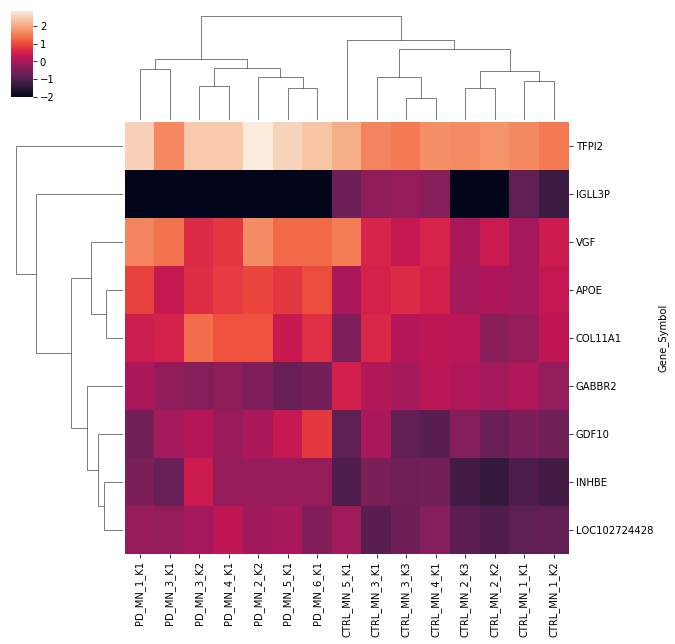

In [82]:
#Find differentially expressed genes uing the criteria: |log2FC|>=2 and p-value<0.05
#Make a subset of the expression dataframe for just differentially expressed genes.
def getDifferentiallyExpressedGenes(log2FoldVals, geneStats=F_cells_Stats):
    # create a dataframe from the log2 fold change calculated above and the p-value
    df = pd.concat([log2FoldVals, geneStats], axis=1)
    # add columns for the new dataframe
    df.columns = ['log', 'p']
    
    # subsets the dataframe using the criteria before turning it into a list and returning it 
    return df.loc[(np.abs((df['log'])) >= 1.5) & (df['p'] < 0.01)].index.tolist()
    #return df.loc[(df['log'] >= 2) & (df['p'] < 0.05)]
        

#a list of the genes that are differentially expressed
diffExpressedIndexes = getDifferentiallyExpressedGenes(log2FoldValues, F_cells_Stats)

# gets the transposed version of the subsetted dataframe from part a because we need to filter based on genes, which are currently 
# the rows not columns 
transLog = F_cells.transpose()
# filter the dataframe based on the genes that are differentially expressed 
diffExpressed = transLog[diffExpressedIndexes]  #[list(diffExpressedIndexes)] 
#transposes the diffExpressed dataframe again to return it to the original state with genes as the rows
diffExpressed = diffExpressed.transpose()
seaborn.clustermap(diffExpressed)

In [56]:
# this gets the fibroblasts cells into a dictionary with a key and values 
p_dict_F_cells = F_cells_Stats.to_dict()
p_dict_F_cells

{'ENSG00000224064': 0.38868097867816687,
 'SYNPR': 0.0432354980662879,
 'AK055014': 0.8222555178330542,
 'ENSG00000214335': 0.17526515185008074,
 'LTBP1': 0.3344226996284694,
 'TSR2': 0.7743916031747191,
 'ENSG00000241556': 0.2256829290702287,
 'ATP6V1E2': 0.8819451044992148,
 'AK124095': 0.7782093319811909,
 'PRINS': 0.31838186444489813,
 'SLC19A1': 0.32625143468467344,
 'XCL1': 0.9970373171456559,
 'NKAIN2': 0.4006610864266178,
 'AK092072': 0.3959537006918912,
 'ZNF626': 0.5361029447711565,
 'ASLL': 0.6259022899261155,
 'CDRT1': 0.27814318199330534,
 'ADORA2A-AS1': 0.6377466149185498,
 'PCDH8': 0.5451257006776395,
 'AK098409': 0.04964238446402658,
 'KHDC1': 0.3162241316452299,
 'UXT': 0.40961990948537075,
 'CISD1': 0.2895236618419108,
 'HIP1': 0.8105936198508037,
 'CD247': 0.42225425550276885,
 'OGFRP1': 0.19200356601299795,
 'RAB9A': 0.15968401339501415,
 'SIRT6': 0.9770272706212266,
 'AK130280': 0.9718503290523444,
 'CCDC122': 0.6124861421494949,
 'ROR1': 0.056937389656110504,
 'EI

In [57]:
deg_list_F_cells = []
for key in p_dict_F_cells.keys():
    if p_dict_F_cells[key] < 0.01:
        deg_list_F_cells.append(key)

In [58]:
#this prints out all the significant DEG that are within the fibroblasts cells
deg_list_F_cells

['ENSG00000231940',
 'KCNA7',
 'CRB1',
 'ANKRD55',
 'PTPRN2',
 'LOC100288443',
 'EMB',
 'ENSG00000271543',
 'ENSG00000214908',
 'NLRC3',
 'PTCSC1',
 'MDM2',
 'AK093761',
 'CBFB',
 'PAFAH2',
 'CASQ1',
 'SYT13',
 'PCDHB11',
 'LOC285147',
 'EID2B',
 'MAP1LC3C',
 'LOC650157',
 'NWD2',
 'ATP2B2',
 'PABPC1L2A',
 'EFCAB10',
 'CLDN7',
 'MATN2',
 'TFPI2',
 'NKX2-5',
 'WNT1',
 'TAC1',
 'ZIC4',
 'NPTX1',
 'DCLK3',
 'ENSG00000257074',
 'ABCA6',
 'VSTM2A',
 'GABRA3',
 'IFITM1',
 'ENSG00000230154',
 'TPM3P9',
 'SIRT2',
 'HMX3',
 'TSPAN7',
 'ICA1L',
 'LONP2',
 'JSRP1',
 'ALPL',
 'RHBDD1',
 'GXL_1223680',
 'PINK1',
 'TMOD2',
 'ENSG00000261527',
 'LINC00367',
 'AK023464',
 'ENSG00000242353',
 'MTAP',
 'LRRC14B',
 'PMEL',
 'DLK2',
 'OR2K2',
 'LSMEM2',
 'RABGAP1L',
 'SCGB1B2P',
 'GMCL1P1',
 'AK311192',
 'ARID5B',
 'HIST1H4H',
 'ENSG00000232563',
 'PDK3',
 'FXYD6',
 'F10',
 'VGF',
 'LINC00452',
 'F2',
 'CELF6',
 'SLC45A3',
 'SAMD3',
 'GAD1',
 'ESRP2',
 'SLC4A10',
 'ENSG00000217094',
 'HGD',
 'LRRTM1',
 'H

In [59]:
FCset = F_cells.filter(items = deg_list_F_cells, axis=0)

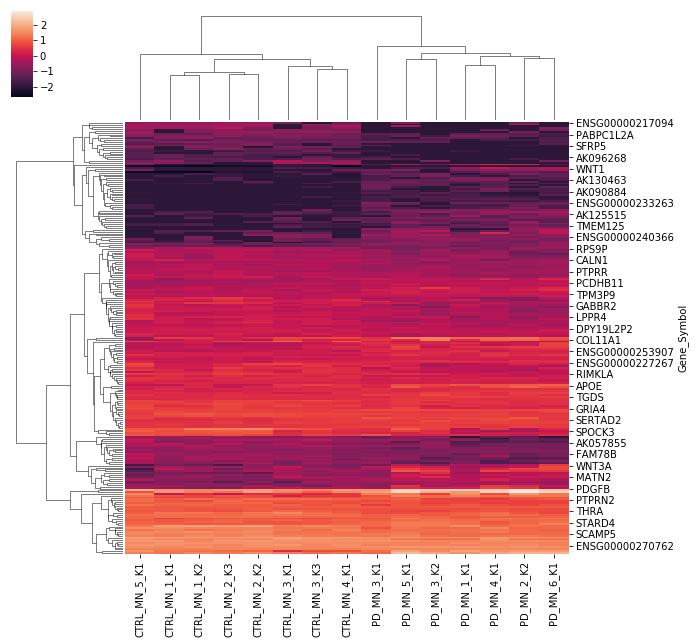

In [60]:
seaborn.clustermap(FCset)

In [61]:
MBset = mb.filter(items = deg_list_mb, axis=0)

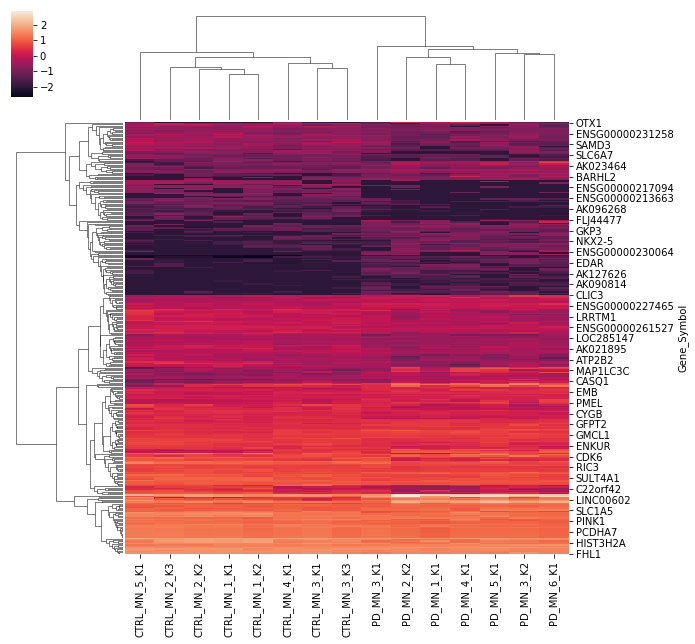

In [62]:
seaborn.clustermap(MBset)

In [63]:
SCset = sc.filter(items = deg_list_sc, axis=0)

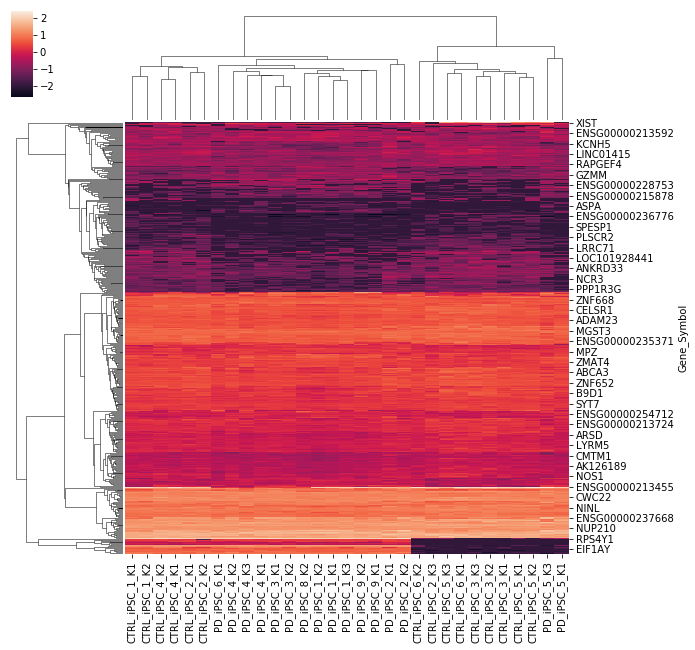

In [64]:
seaborn.clustermap(SCset)

In [65]:
#mid brain and stem cells
def intersection (deg_list_mb, deg_list_sc):
    list_sc_mb = [value for value in deg_list_mb if value in deg_list_sc]
    return list_sc_mb

In [66]:
#midbrain and stem cells
print (intersection(deg_list_mb, deg_list_sc))

['NLRC3', 'CASQ1', 'ABCC2', 'TPM3P9', 'TRPC5', 'IGLL3P']


In [93]:
#midbrain and fibro
def intersection (deg_list_F_cells, deg_list_mb):
    list_mbbb= [value for value in deg_list_F_cells if value in deg_list_mb]
    return list_mbbb

In [95]:
#midbrain and fibro
print (len(intersection(deg_list_F_cells, deg_list_mb)))

227


In [78]:
def intersection (deg_list_F_cells, deg_list_sc):
    list_f_sc = [value for value in deg_list_F_cells if value in deg_list_sc]
    return list_f_sc

In [79]:
#fibro and stem cells 
print(intersection(deg_list_F_cells, deg_list_sc))

['NLRC3', 'CASQ1', 'TPM3P9', 'IGLL3P']


In [88]:
def intersection (deg_list_F_cells, deg_list_sc, deg_list_mb):
    list_f_sc_mb = [value for value in deg_list_F_cells if value in deg_list_sc if value in deg_list_mb]
    return list_f_sc_mb

In [89]:
print(intersection(deg_list_F_cells, deg_list_sc, deg_list_mb))

['NLRC3', 'CASQ1', 'TPM3P9', 'IGLL3P']
